In [5]:
import numpy as np
import pandas as pd
from faker import Faker 
from pandas import DataFrame
from matplotlib import pyplot

date = pd.date_range(start ='1-10-2020',end ='1-11-2020', freq ='600S')
pas = pd.DataFrame({'timestamp': date,'no_of_pass':pd.Series(np.random.randint(150,200, size=len(date))).astype(int)})
passenger = pas.set_index('timestamp')
trolldate = pd.date_range(start ='1-10-2020',end ='1-11-2020', freq ='600S')
trolley = pd.DataFrame({'timestamp':trolldate,'no_of_troll':pd.Series(np.random.randint(10,185,size=len(trolldate)))})

passenger.to_csv('passenger1.csv')
trolley.to_csv('trolley.csv')#

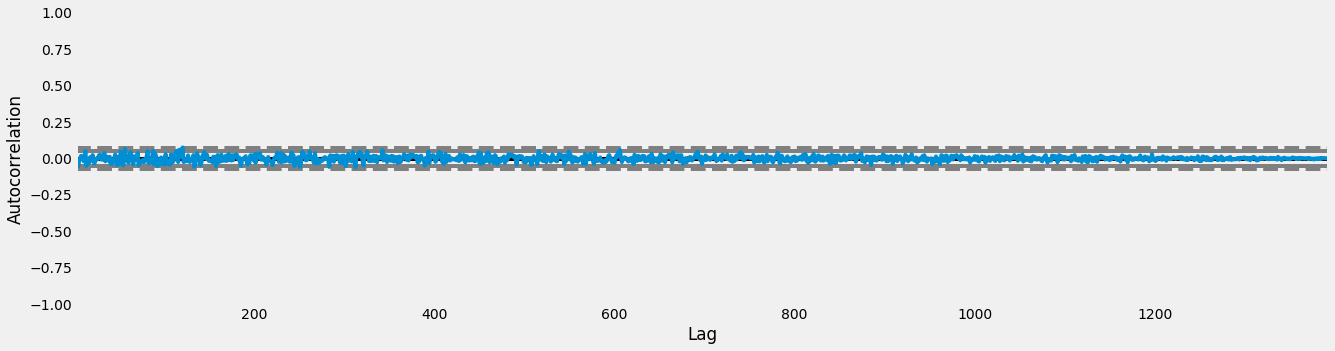

                             ARIMA Model Results                              
Dep. Variable:           D2.no_of_con   No. Observations:                 1391
Model:                 ARIMA(7, 2, 0)   Log Likelihood               -7754.870
Method:                       css-mle   S.D. of innovations             63.748
Date:                Mon, 03 Aug 2020   AIC                          15527.740
Time:                        13:10:05   BIC                          15574.880
Sample:                    01-01-2020   HQIC                         15545.368
                         - 01-30-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0117      0.192     -0.061      0.951      -0.389       0.365
ar.L1.D2.no_of_con    -1.5087      0.026    -57.719      0.000      -1.560      -1.457
ar.L2.D2.no_of_con  

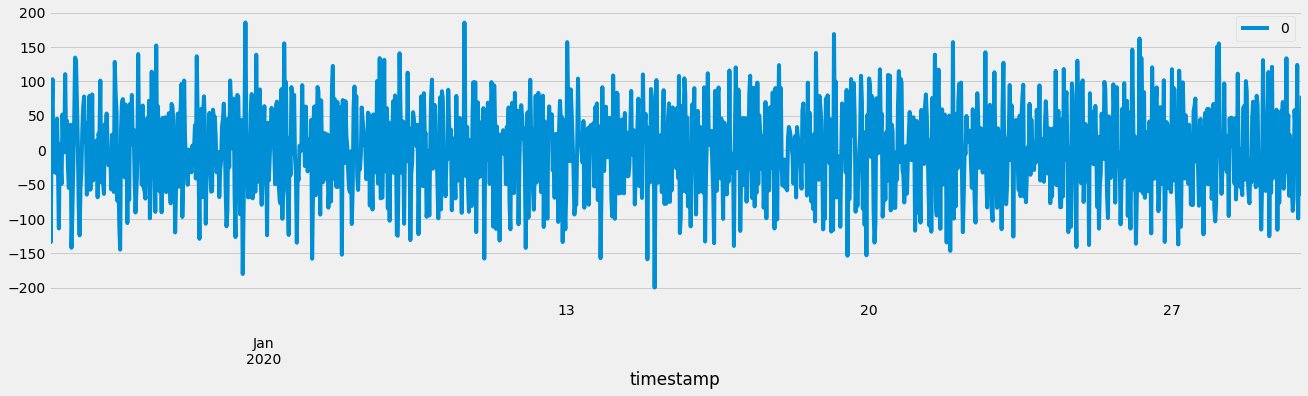

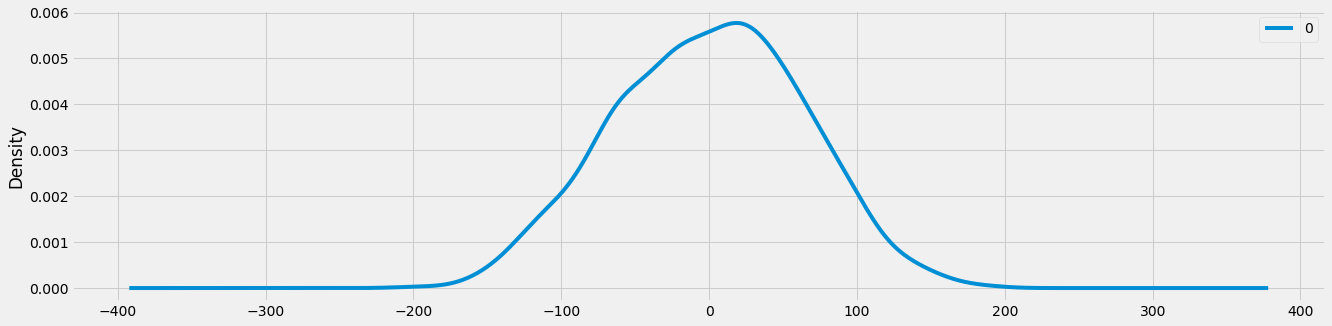

                 0
count  1391.000000
mean     -0.050820
std      63.875974
min    -199.653296
25%     -46.390613
50%       1.227357
75%      45.543270
max     185.549174
predicted=108.974547, expected=133.000000
predicted=111.591736, expected=182.000000
predicted=159.288936, expected=227.000000
predicted=206.247355, expected=193.000000
predicted=209.019390, expected=115.000000
predicted=151.372160, expected=66.000000
predicted=88.740666, expected=118.000000
predicted=93.910857, expected=238.000000
predicted=182.664116, expected=187.000000
predicted=210.772688, expected=187.000000
predicted=187.161157, expected=87.000000
predicted=133.295880, expected=156.000000
predicted=124.158998, expected=174.000000
predicted=165.817347, expected=119.000000
predicted=144.513486, expected=157.000000
predicted=139.532230, expected=24.000000
predicted=85.599123, expected=118.000000
predicted=74.405469, expected=208.000000
predicted=166.602093, expected=104.000000
predicted=152.212116, expected=150.000

predicted=65.644733, expected=163.000000
predicted=125.599613, expected=157.000000
predicted=159.912097, expected=132.000000
predicted=143.782382, expected=69.000000
predicted=98.489945, expected=113.000000
predicted=92.444948, expected=30.000000
predicted=68.855030, expected=169.000000
predicted=103.779520, expected=84.000000
predicted=124.005515, expected=179.000000
predicted=134.361071, expected=208.000000
predicted=194.527575, expected=149.000000
predicted=176.840070, expected=136.000000
predicted=142.185218, expected=100.000000
predicted=116.948226, expected=16.000000
predicted=55.354524, expected=213.000000
predicted=120.307580, expected=164.000000
predicted=187.139014, expected=30.000000
predicted=92.771056, expected=83.000000
predicted=58.178192, expected=158.000000
predicted=123.018691, expected=149.000000
predicted=153.297764, expected=94.000000
predicted=119.732238, expected=181.000000
predicted=140.420027, expected=149.000000
predicted=164.059620, expected=137.000000
predic

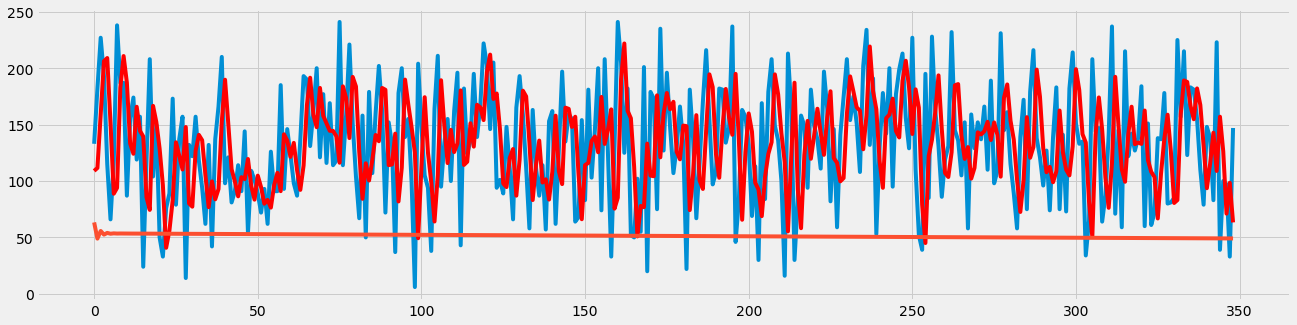

In [49]:
from pandas import read_csv
import datetime
from matplotlib import pyplot
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot_2samples

dataset = pd.read_csv('./area1.csv', squeeze=True)
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['timestamp'])
'''
plt.xlabel("Time")
plt.ylabel("No Con")
plt.plot(indexedDataset.tail())
'''

with pyplot.rc_context():
    pyplot.rc("figure", figsize=(20,5))
    autocorrelation_plot(indexedDataset)
    pyplot.show()

model = ARIMA(indexedDataset, order=(7,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

area = DataFrame(model_fit.resid)
area.plot()
pyplot.show()
area.plot(kind='kde')
pyplot.show()
print(area.describe())


model_fit=[]
X = indexedDataset.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % np.sqrt(error))
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.plot(model_fit.forecast(steps=len(test))[0])
pyplot.rc("figure", figsize=(20,5))
pyplot.show()


In [47]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
# prophet model 
from fbprophet import Prophet
# prophet preformance
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from pandas import read_csv
import datetime
from matplotlib import pyplot
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.gofplots import qqplot_2samples

# don't do this 
warnings.filterwarnings('ignore')
# "high resolution"
%config InlineBackend.figure_format = 'retina'

wmt = pd.read_csv('./area1.csv')

wmt.info()
wmt.head(5)



AttributeError: module 'importlib._bootstrap' has no attribute 'SourceFileLoader'

In [253]:
wmt = wmt[['timestamp','no_of_con']]

In [254]:
wmt.columns = ['ds','y']
wmt.ds = pd.to_datetime(wmt.ds)

m = Prophet()

m.fit(wmt)
wmt.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,y
1388,2020-01-29 22:00:00,39
1389,2020-01-29 22:30:00,100
1390,2020-01-29 23:00:00,97
1391,2020-01-29 23:30:00,33
1392,2020-01-30 00:00:00,147


In [255]:
m = Prophet()
m.fit(wmt)

future = m.make_future_dataframe(periods=30)
future.tail()


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
1418,2020-02-25
1419,2020-02-26
1420,2020-02-27
1421,2020-02-28
1422,2020-02-29


In [256]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1418,2020-02-25,145.788425,81.525684,211.090188
1419,2020-02-26,132.621565,68.749318,197.691763
1420,2020-02-27,135.619077,69.827905,203.041991
1421,2020-02-28,138.524489,69.757514,201.227628
1422,2020-02-29,143.019705,73.663901,209.444937


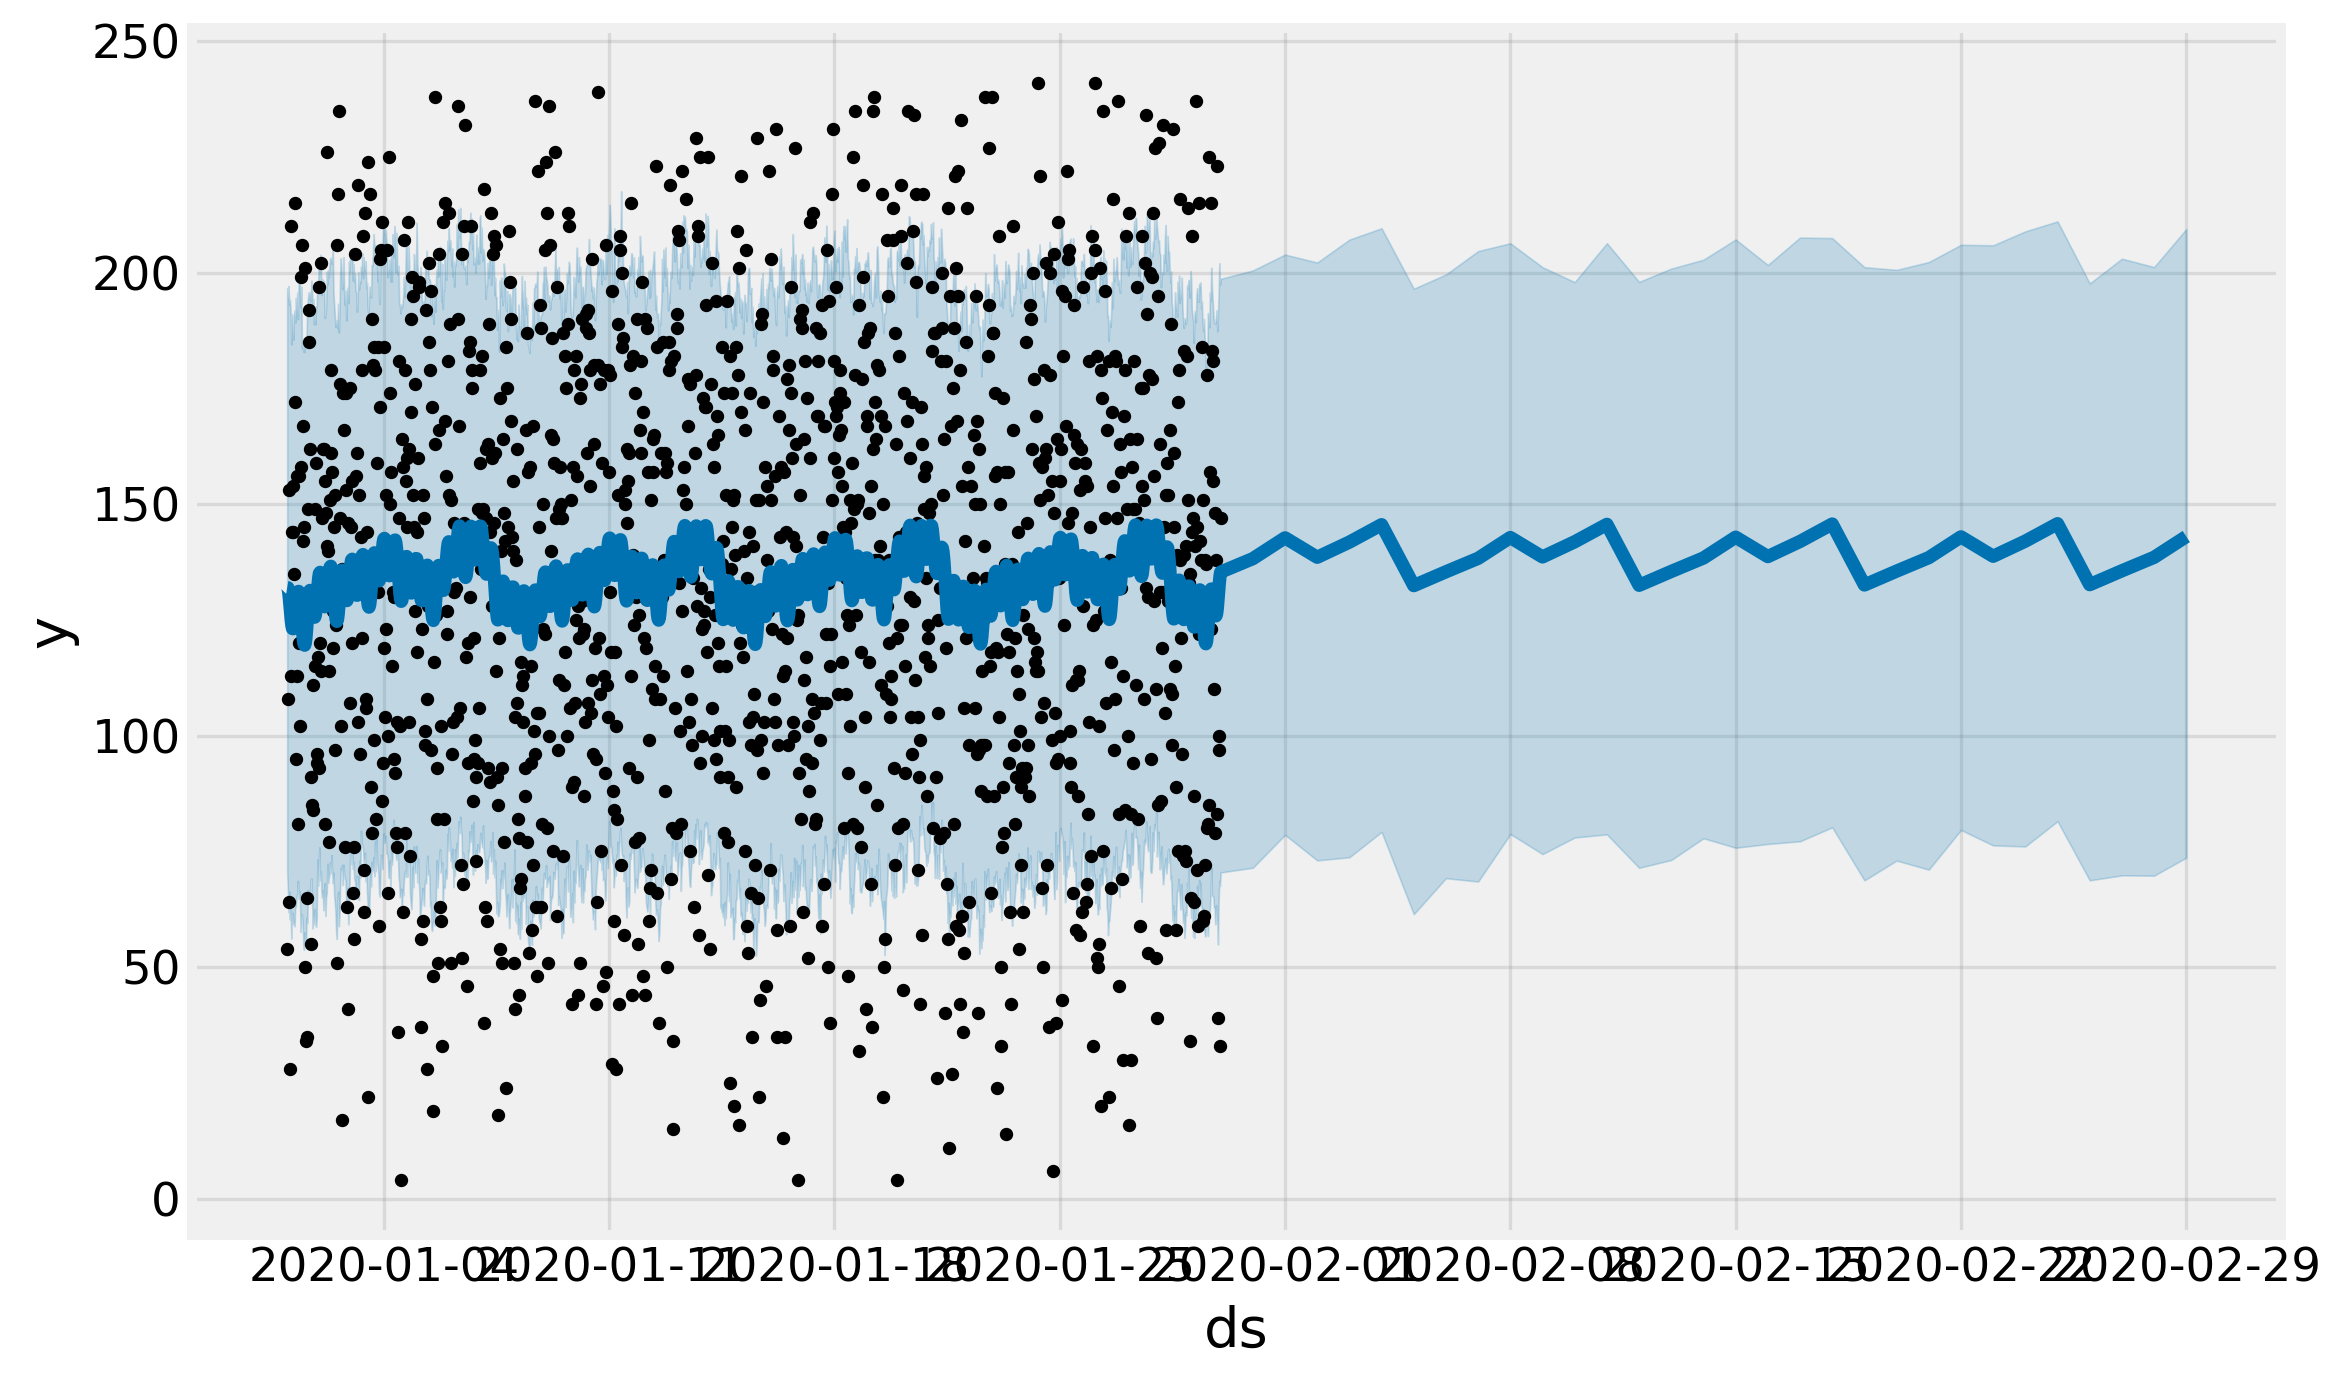

In [257]:
fig1 = m.plot(forecast)


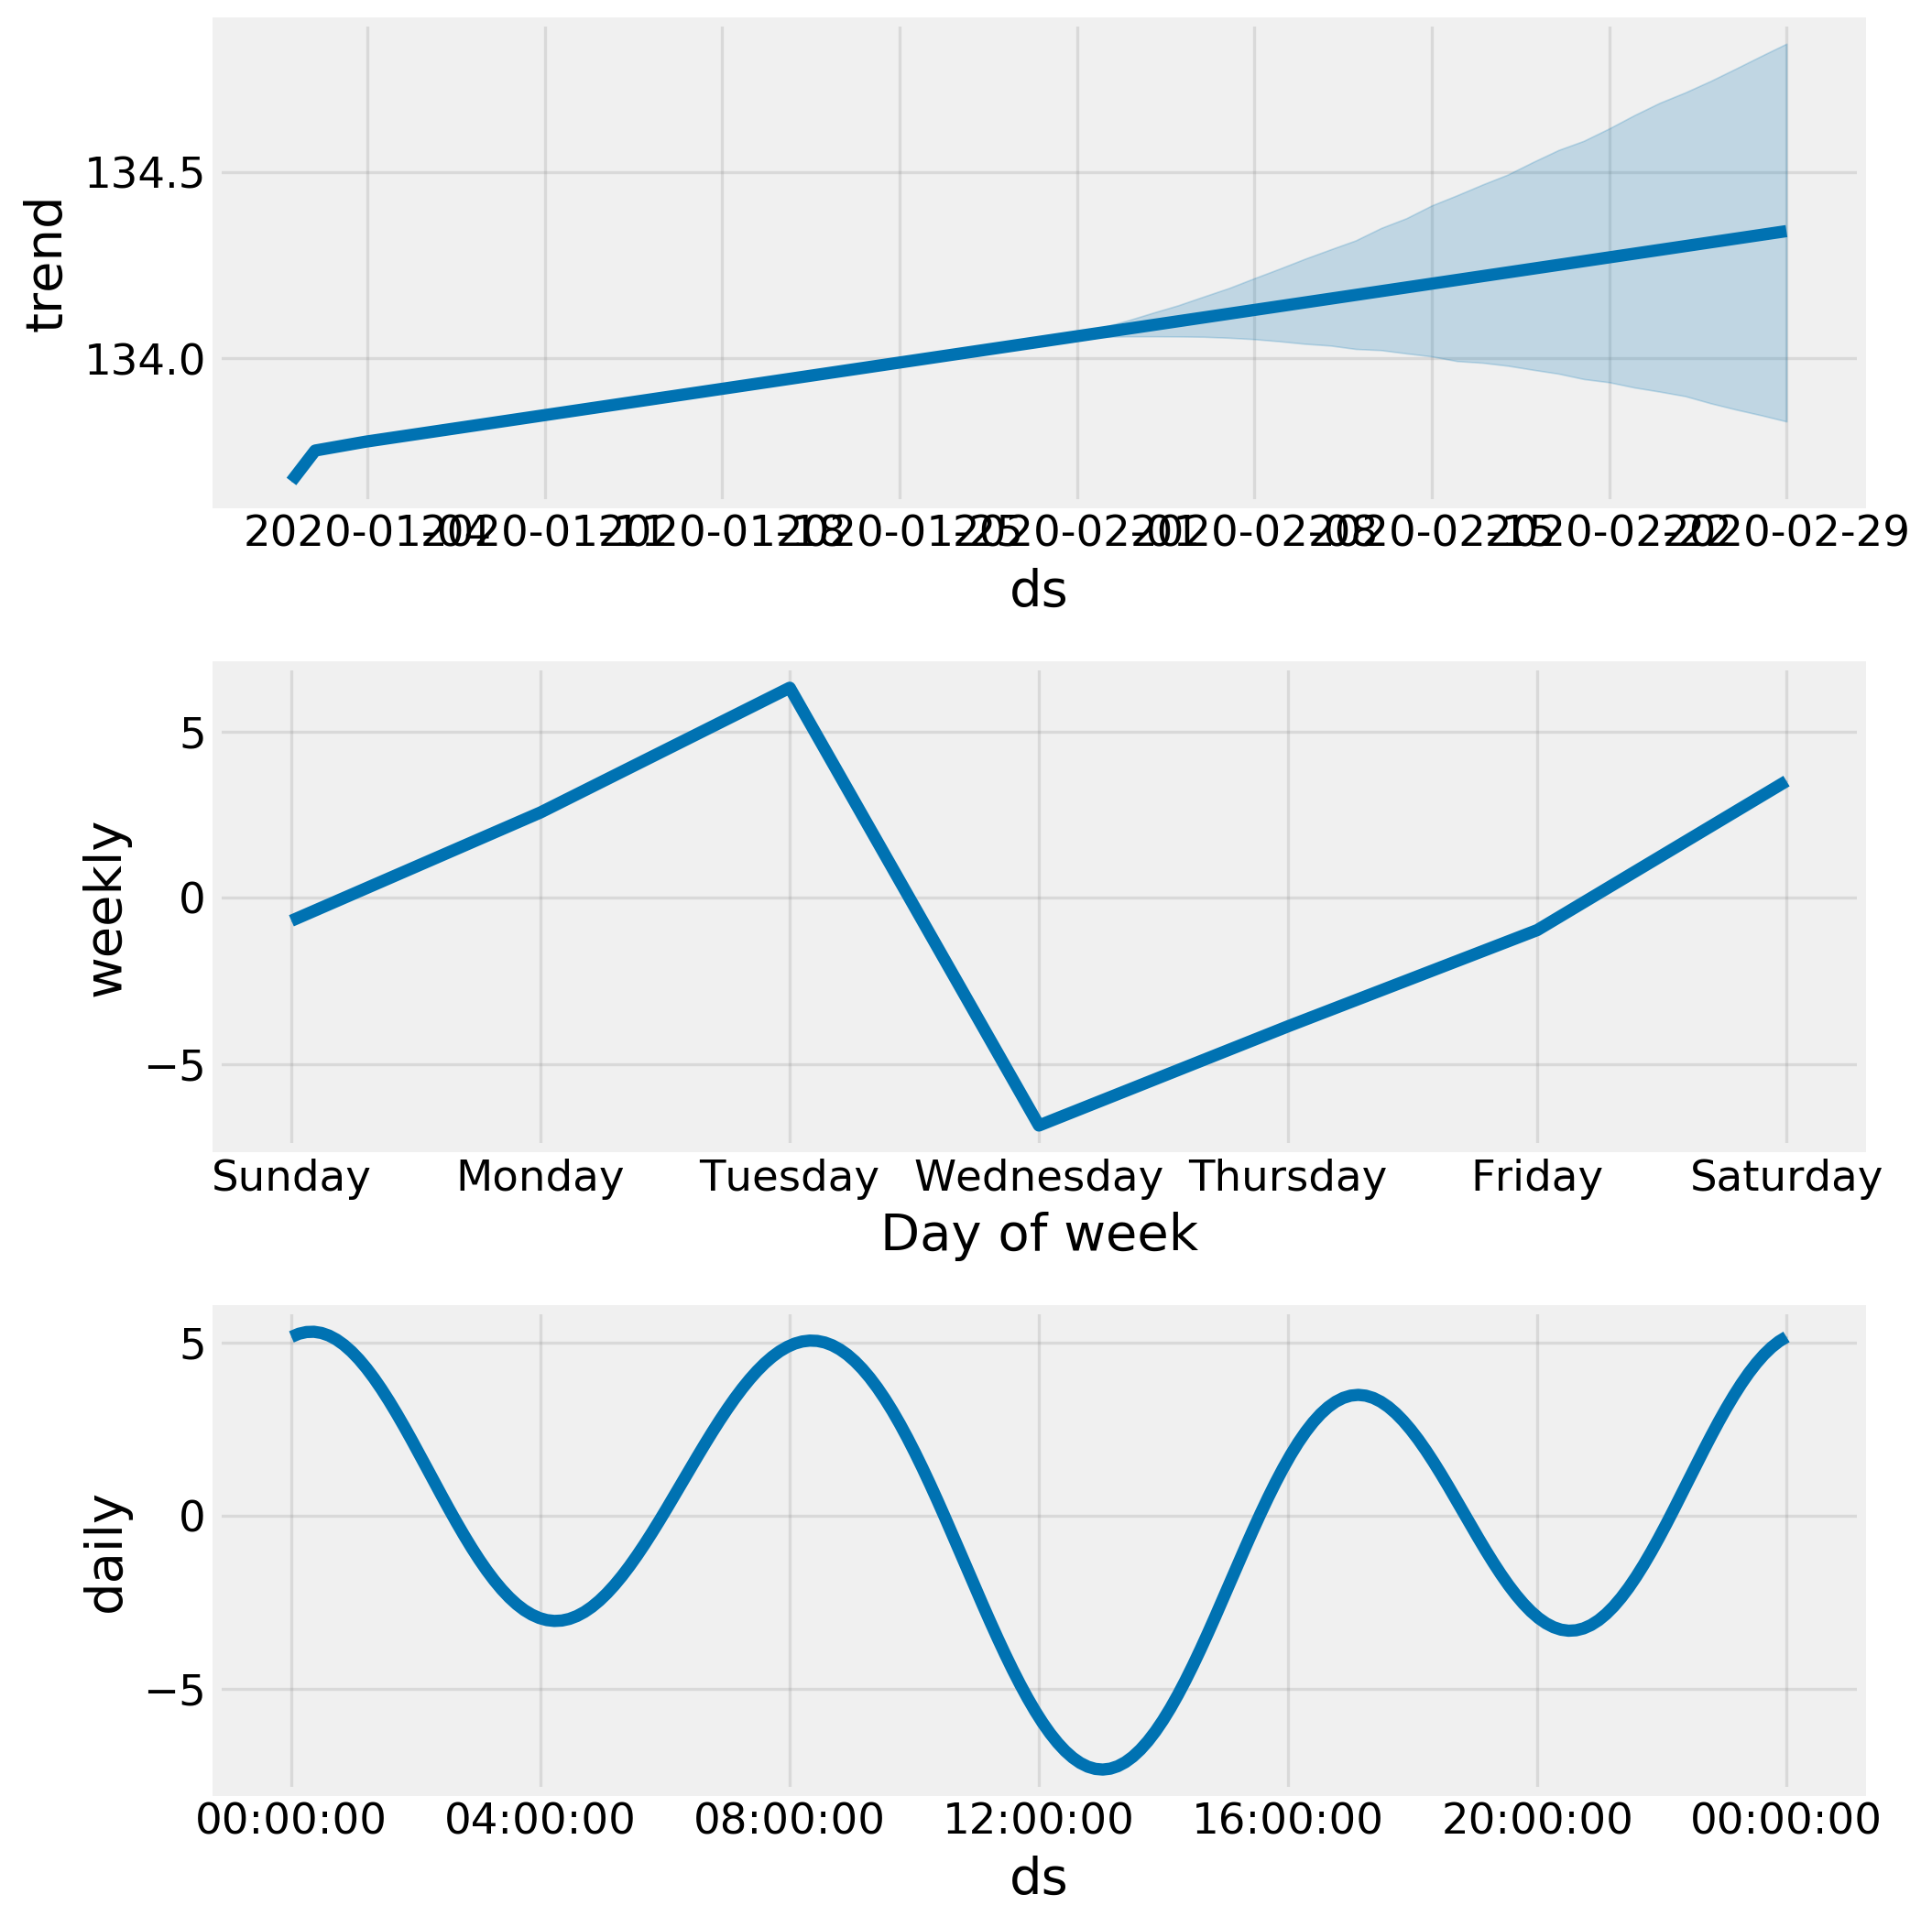

In [258]:
fig2 = m.plot_components(forecast)


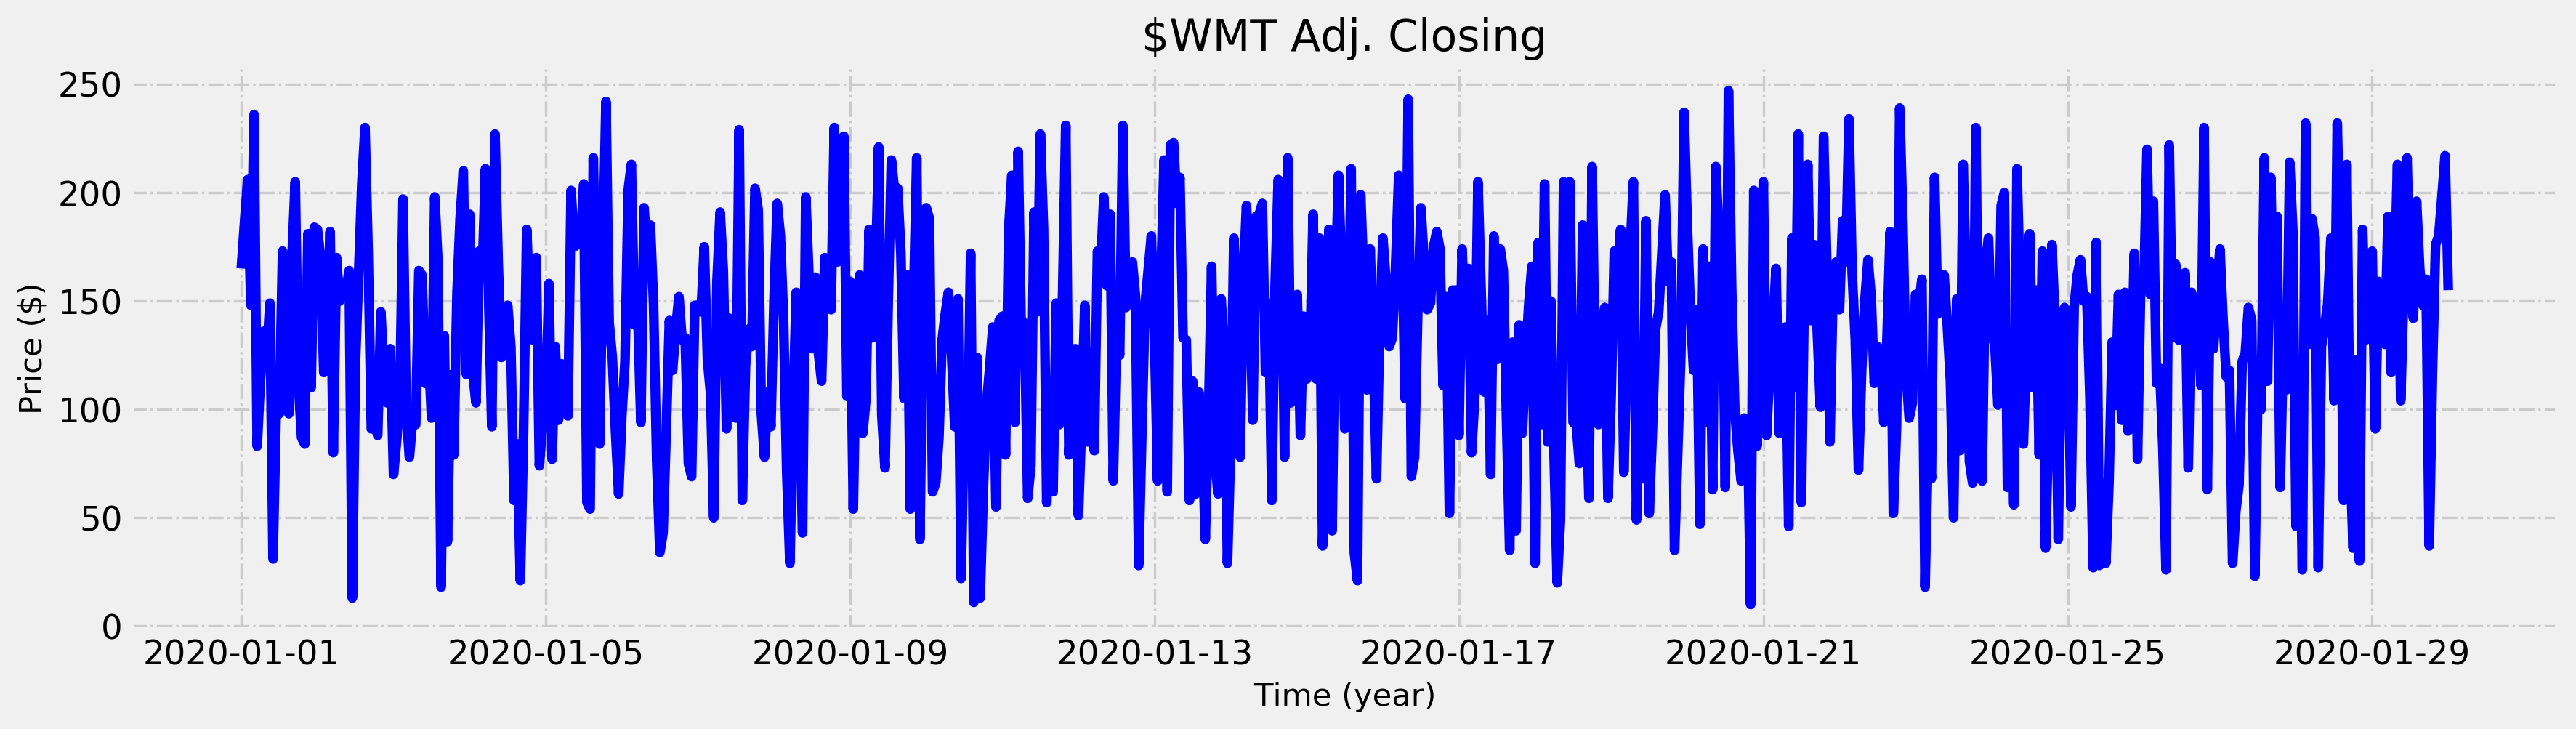

In [244]:
# frame up w/ grid
plt.figure(figsize=(16,4))
plt.grid(linestyle='-.')

# sketch in data
plt.plot(wmt.ds, wmt.y, 'b')

# set title & labels
plt.title('$WMT Adj. Closing', fontsize=18)
plt.ylabel('Price ($)', fontsize=13)
plt.xlabel('Time (year)', fontsize=13)

# display graph
plt.show()

In [245]:
print(wmt)

                     ds    y
0   2020-01-01 00:00:00  165
1   2020-01-01 01:00:00  186
2   2020-01-01 02:00:00  206
3   2020-01-01 03:00:00  148
4   2020-01-01 04:00:00  236
..                  ...  ...
692 2020-01-29 20:00:00  176
693 2020-01-29 21:00:00  180
694 2020-01-29 22:00:00  198
695 2020-01-29 23:00:00  217
696 2020-01-30 00:00:00  155

[697 rows x 2 columns]


In [46]:
model_fit=[]
indexedDataset = wmt.set_index(['ds'])
X = indexedDataset.values
size = int(len(X) * 0.40)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
print("Loading..")
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % np.sqrt(error))
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.plot(model_fit.forecast(steps=len(test))[0])
pyplot.rc("figure", figsize=(20,5))
pyplot.show()


NameError: name 'wmt' is not defined

                     no_of_con
timestamp                     
2020-01-01 00:00:00         54
2020-01-01 00:30:00        108
2020-01-01 01:00:00         64
2020-01-01 01:30:00        153
2020-01-01 02:00:00         28


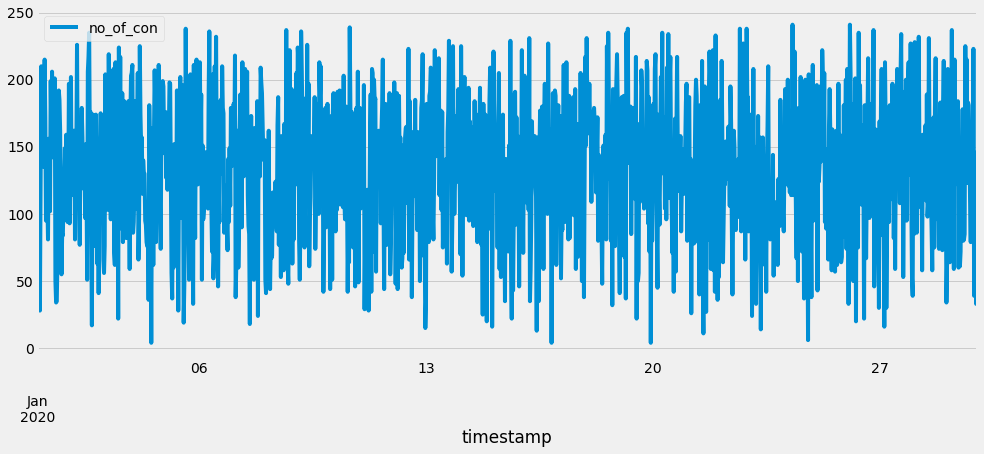

In [13]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.show()

# data = sm.datasets.co2.load_pandas()
# y = data.data

# y = pd.read_csv('./area1.csv')

# print(y)

dataset = pd.read_csv('./area1.csv', squeeze=True)
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'], infer_datetime_format=True)
y = dataset.set_index(['timestamp'])

# The term bfill means that we use the value before filling in missing values
# y = y.fillna(y.bfill())

print(y.head(5))

y.plot(figsize=(15, 6))
plt.show()

In [14]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:17770.855663018654
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:16728.80699651383
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:15654.06981550739
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:14698.937784550988
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:15582.23959611082
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:14833.757775323433
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:15200.72618902554
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:14697.100392192191
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16866.575512811956
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:16259.27324670153
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:15642.766621038354
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:14689.240324245537
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:15569.494471241858
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:14823.38748498412
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:15201.145194681752
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:14687.251217295521
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:15824.296998518175
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:15681.9356063462


In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0300      0.028      1.054      0.292      -0.026       0.086
ma.L1         -1.0000      3.868     -0.259      0.796      -8.581       6.581
ar.S.L12       0.0451      0.025      1.841      0.066      -0.003       0.093
ma.S.L12      -1.0000     13.115     -0.076      0.939     -26.705      24.705
sigma2      2601.6805   3.55e+04      0.073      0.942    -6.7e+04    7.22e+04


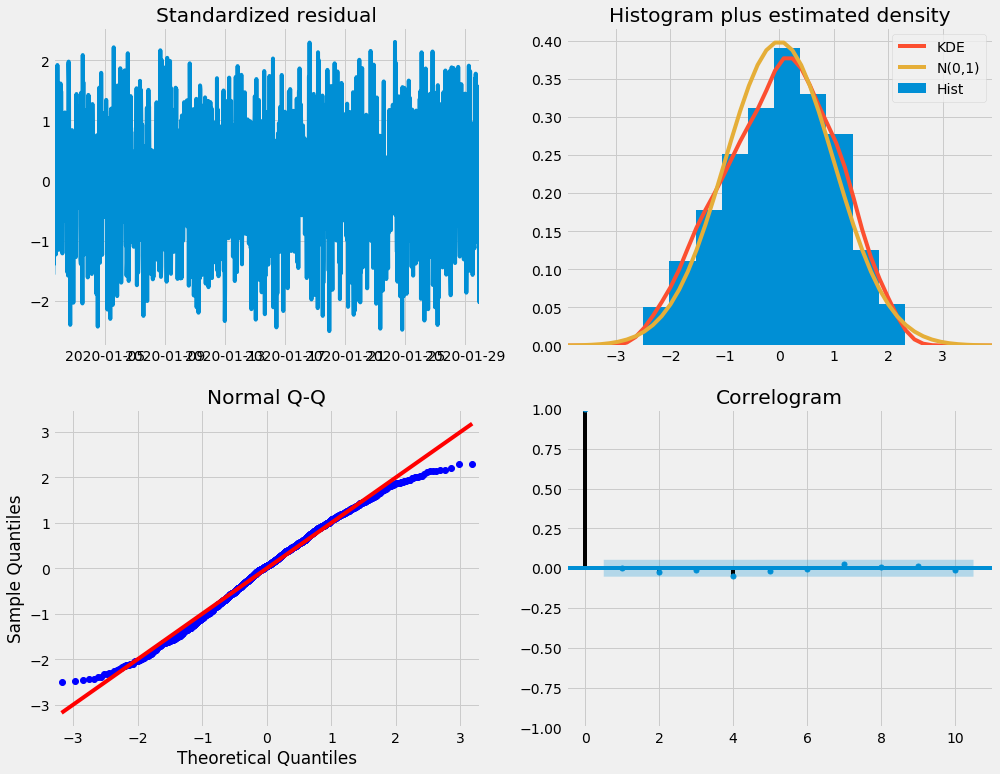

In [17]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()

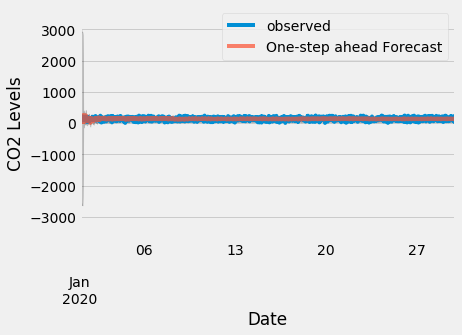

In [20]:
ax = y['no_of_con'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [21]:
y_forecasted = pred.predicted_mean
y_truth = y['no_of_con']

print(y_truth)

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

timestamp
2020-01-01 00:00:00     54
2020-01-01 00:30:00    108
2020-01-01 01:00:00     64
2020-01-01 01:30:00    153
2020-01-01 02:00:00     28
                      ... 
2020-01-29 22:00:00     39
2020-01-29 22:30:00    100
2020-01-29 23:00:00     97
2020-01-29 23:30:00     33
2020-01-30 00:00:00    147
Name: no_of_con, Length: 1393, dtype: int64
The Mean Squared Error of our forecasts is 2780.99


In [22]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

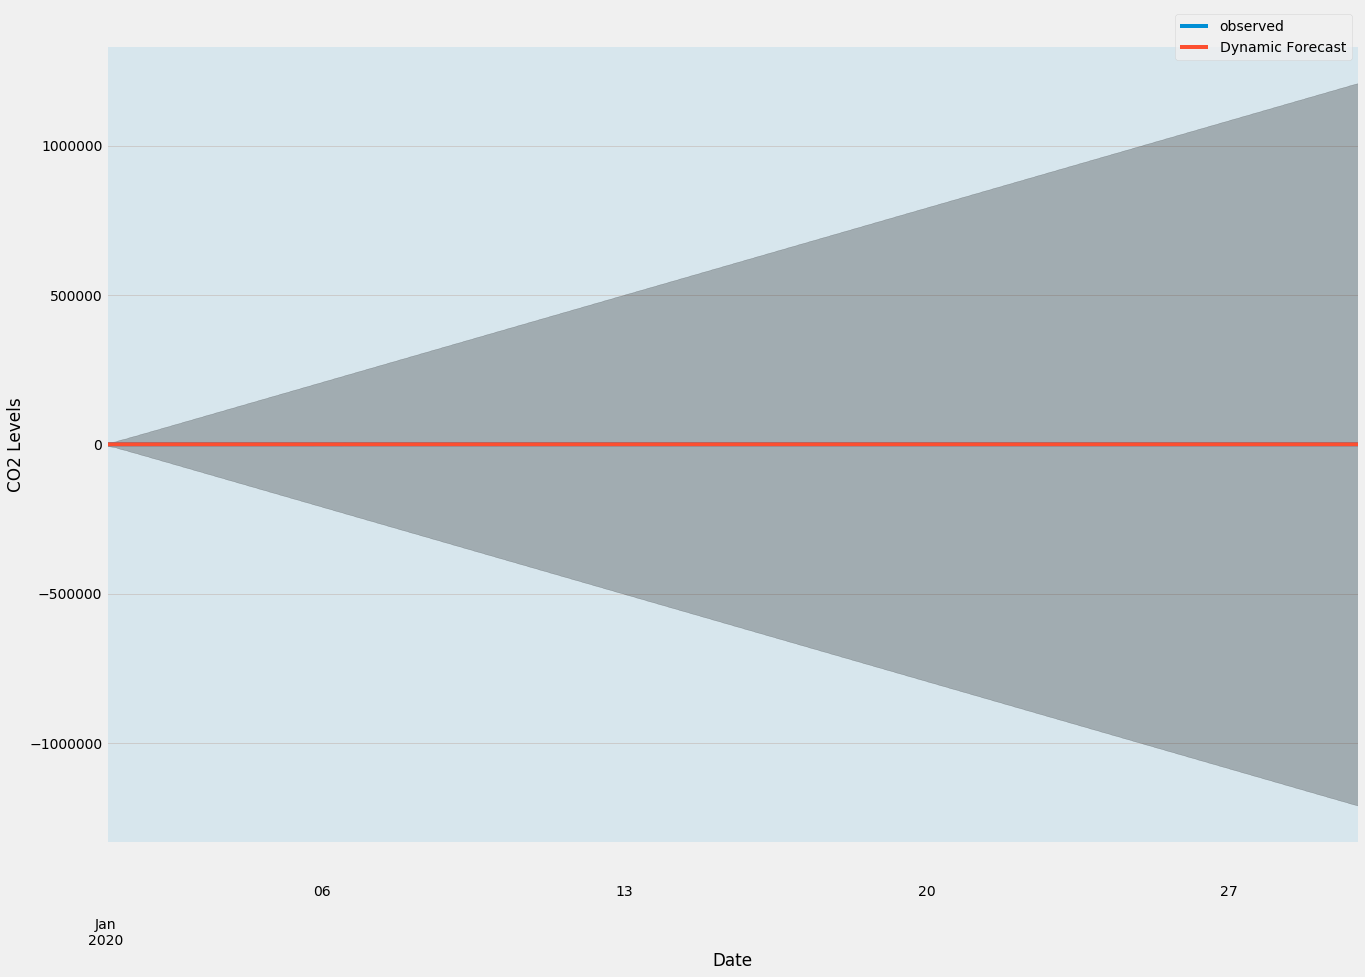

In [23]:
ax = y['no_of_con'].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [24]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['no_of_con']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 20465.37


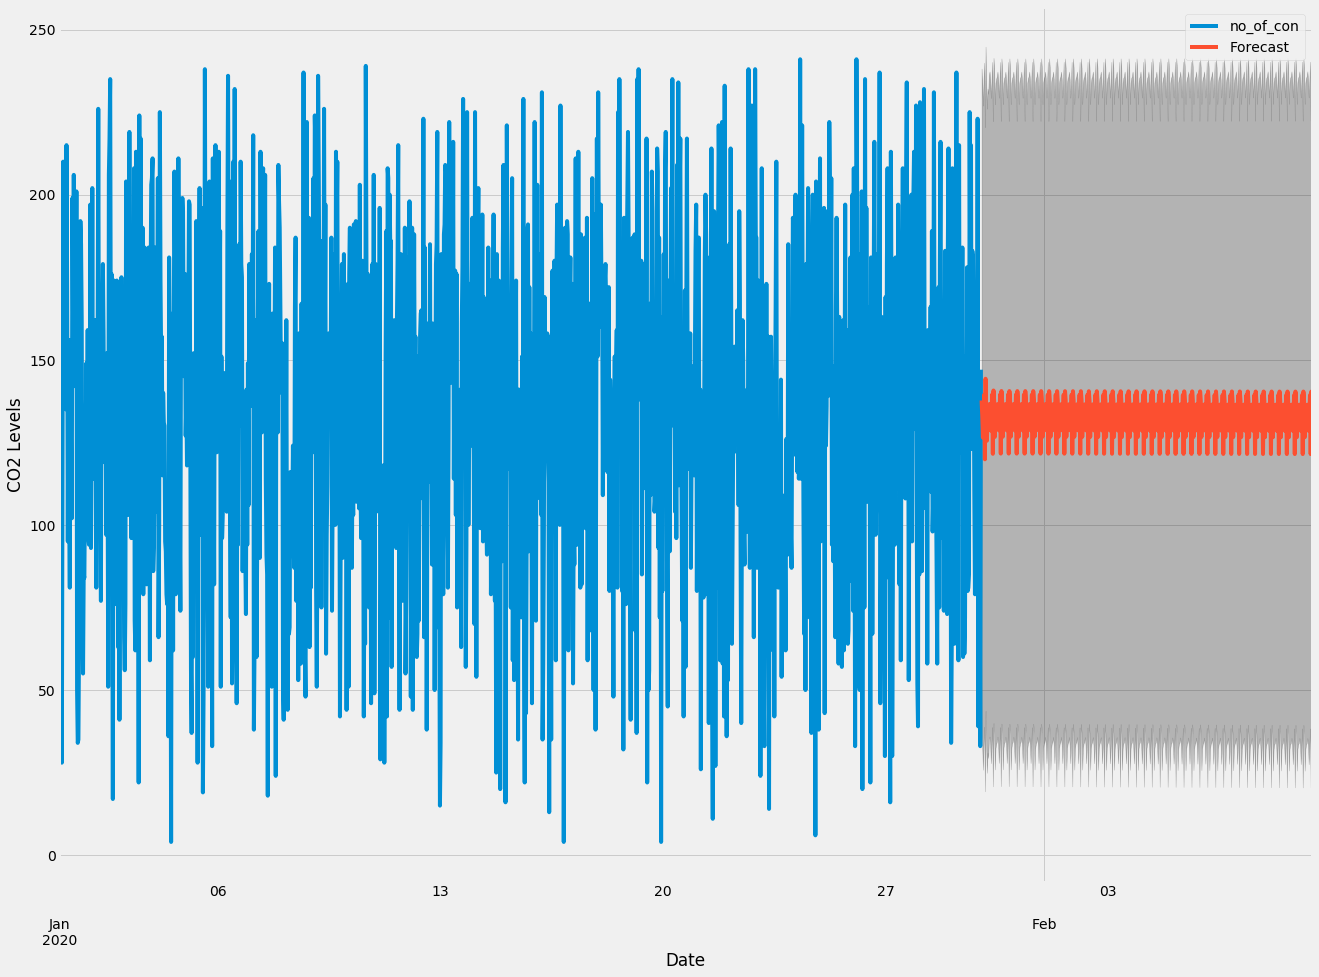

In [25]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()